# Decision Tree + Random Forest + Ensemble Techniques - Class Assessment

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the dataset

data=pd.read_csv("D:/MKCE/ML 2/Decision Tree + Random Forest + Ensemble Techniques/admission.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#Generate the correlation matrix

data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

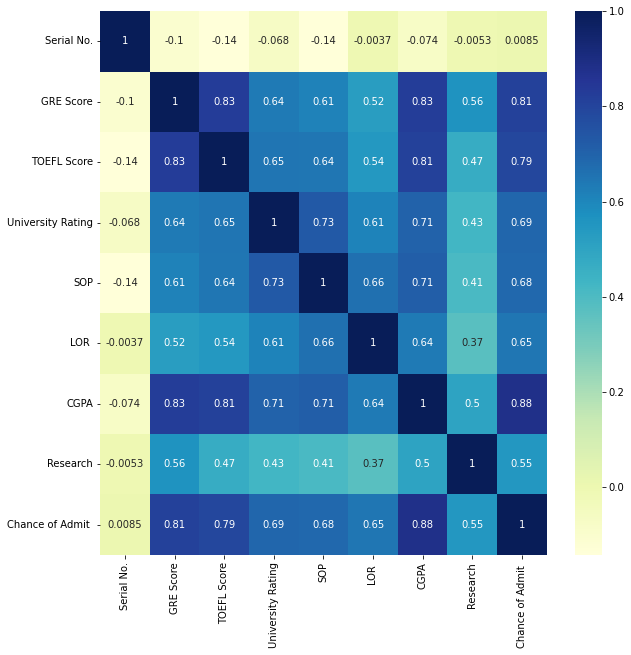

In [7]:
#viusalizing correlogram

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

(array([[ 49.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  51.],
        [  0.,   0.,   0.,   0.,   0.,  41., 459.,   0.,   0.,   0.],
        [  0.,  54., 446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 9 BarContainer objects>)

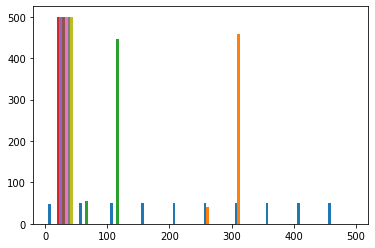

In [8]:
plt.hist(data)

In [9]:
#Visualize the 10 random rows of the data set

samp=data.sample(n=10)
samp

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
416,417,315,104,3,4.0,2.5,8.10,0,0.65
195,196,307,107,2,3.0,3.5,8.52,1,0.78
190,191,324,111,5,4.5,4.0,9.16,1,0.90
76,77,327,112,3,3.0,3.0,8.72,1,0.74
109,110,304,103,5,5.0,4.0,8.64,0,0.68
453,454,319,103,3,2.5,4.0,8.76,1,0.73
235,236,326,111,5,4.5,4.0,9.23,1,0.88
293,294,312,98,1,3.5,3.0,8.18,1,0.64
363,364,306,103,2,2.5,3.0,8.36,0,0.69
182,183,299,100,2,3.0,3.5,7.88,0,0.68


In [10]:
#Generate the description for numeric variables

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
#Check the shape of the data set

data.shape

(500, 9)

<Figure size 1440x1440 with 0 Axes>

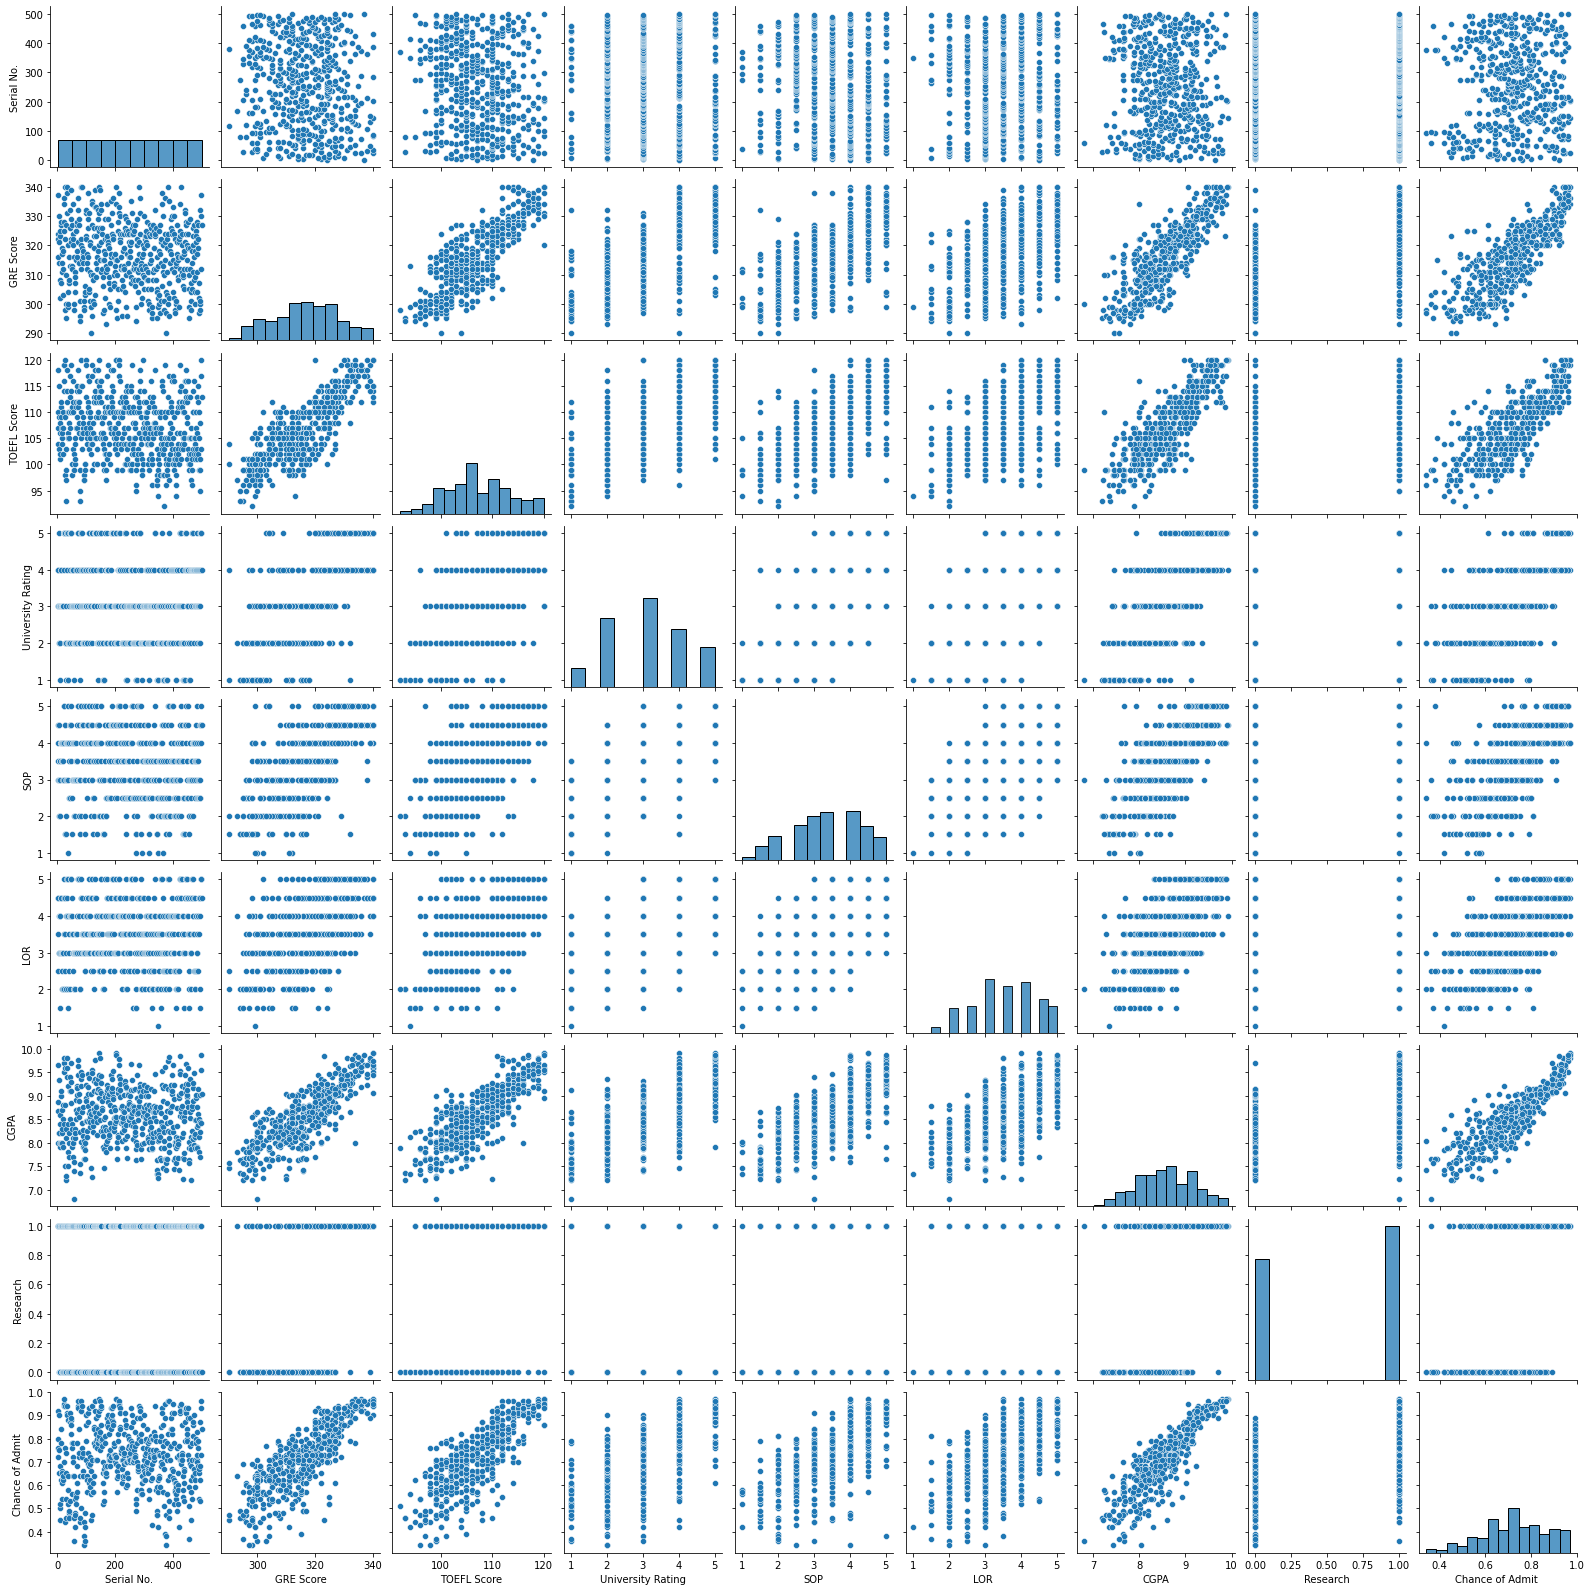

In [12]:
#visualizing dataset in pairplot

plt.figure(figsize=(20,20))
sns.pairplot(data)

In [13]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
#finding minimum nd maximum

minimum=data["GRE Score"].min()
maximum=data["GRE Score"].max()

In [15]:
print(minimum)
print(maximum)

290
340


In [16]:
#finding percentage of universities for each university rating

per=data['University Rating'] / data['University Rating'].sum()* 100

In [17]:
per

0      0.256904
1      0.256904
2      0.192678
3      0.192678
4      0.128452
         ...   
495    0.321130
496    0.321130
497    0.321130
498    0.256904
499    0.256904
Name: University Rating, Length: 500, dtype: float64

In [18]:
#converting “Chance of Admit” to categorical having values 0 and 1:

for i in data['Chance of Admit ']:
    if i<0.80:
        data.replace(to_replace =i,value =0,inplace=True)
    else:
        data.replace(to_replace =i,value =1,inplace=True)

In [19]:
data["Chance of Admit "]

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [20]:
x=data[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]

In [21]:
y=data['Chance of Admit ']

In [22]:
#importing libraries for model selecting

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
#splitting of datasets for X nd Y 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)


In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((375, 8), (125, 8), (375,), (125,))

In [25]:
#Decision tree classifier

model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
ypre=model.predict(x_test)

In [27]:
accuracy_score(y_test,ypre)

0.912

In [28]:
confusion_matrix(y_test,ypre)

array([[78,  4],
       [ 7, 36]], dtype=int64)

In [29]:
sc = StandardScaler()

In [30]:
pca = decomposition.PCA()   

In [31]:
decisiontree = tree.DecisionTreeClassifier()  

In [32]:
pipe = Pipeline(steps=[('sc', sc), 
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

In [33]:
n_components = list(range(1,x.shape[1]+1,1))

In [34]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

In [35]:
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

In [36]:
clf = GridSearchCV(pipe, parameters)  

In [37]:
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('decisiontree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [4, 6, 8, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]})

In [38]:
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])

Best Criterion: gini


In [39]:
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])

Best max_depth: 4


In [40]:
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])

Best Number Of Components: 6


In [41]:
print(clf.best_estimator_.get_params()['decisiontree'])    

DecisionTreeClassifier(max_depth=4)


In [42]:
CV_Result = cross_val_score(clf, x, y, cv=4, n_jobs=-1)

In [43]:
print(CV_Result)

[0.872 0.888 0.84  0.88 ]


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#random forest classifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred=rfc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.96

In [48]:
confusion_matrix(y_test,y_pred)

array([[81,  1],
       [ 4, 39]], dtype=int64)

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
#adaboosting classifier

model1=AdaBoostClassifier()

In [51]:
model1.fit(x_train,y_train)

AdaBoostClassifier()

In [52]:
prd=model1.predict(x_test)

In [53]:
accuracy_score(y_test,prd)

0.936

In [54]:
confusion_matrix(y_test,prd)

array([[78,  4],
       [ 4, 39]], dtype=int64)

In [55]:
#tabulating values

pd.DataFrame([[accuracy_score(y_test,ypre),accuracy_score(y_test,y_pred),accuracy_score(y_test,prd)]],columns=["DecisionTreeClassifier","RandomForestClassifier","AdaBoostingClassifier"])

,DecisionTreeClassifier,RandomForestClassifier,AdaBoostingClassifier
0,0.912,0.96,0.936


On oberving and comparing the confusion_matrix and the accuracy_score the optimum model in my experiment is RandomForestClassifier with 96 percent accuracy.